In [1]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.legend_handler import HandlerPatch
from shapely.geometry.point import Point

In [2]:
#spatial unit
region = gpd.read_file(r"D:\NUS\project\Singapore_subzone\region_2019\sg_island_region.shp")
szone = gpd.read_file(r"D:\NUS\project\Singapore_subzone\subzone_2019\sg_island_subzone_2019\master-plan-2019-subzone-boundary-no-sea-geojson-polygon.shp")
szone = szone.to_crs('EPSG:4326')
print(szone.columns)
#input results
gwpr_results = pd.read_csv(r"D:\NUS\project\paper2_results\mgwr_results\clusters_2021\clusters_2021_listwise.csv")

Index(['Name', 'SUBZONE_N', 'SUBZONE_C', 'PLANAREA_N', 'PLANAREA_C',
       'REGION_N', 'REGION_C', 'AREA', 'X_COORD', 'Y_COORD', 'geometry'],
      dtype='object')


In [3]:
#set scalar bar
points = gpd.GeoSeries([Point(102.7,1.25), Point(103.7, 1.25)], crs=4326)
points = points.to_crs('EPSG:3414')
distance_meters = points[0].distance(points[1])
distance_meters

111301.44035524513

In [4]:
lis_szone_1 = list(szone['SUBZONE_N'])
lis_szone_2 = list(gwpr_results['SUBZONE_N'])
lis_removed_szone = []

for i in lis_szone_1:
    if not(i in lis_szone_2):
        lis_removed_szone.append(i)
        
print(len(lis_removed_szone))

15


In [5]:
# get std resi
gwpr_results['resi'] =  gwpr_results[' y'] - gwpr_results[' yhat']
lis = np.array(list(gwpr_results['resi']))
std = np.std(lis)

gwpr_results['stdv_resi'] = gwpr_results['resi']/std

In [6]:
def merge_data(df,sz):
    cols = list(df.columns)
    df1 = pd.DataFrame(columns = ['SUBZONE_N','localpdev','stdv_resi'])
    df1['SUBZONE_N'] = df['SUBZONE_N']
    df1['localpdev'] = df[' localpdev']
    df1['stdv_resi'] = df['stdv_resi']
    
    df2 = sz.merge(df1,on = 'SUBZONE_N',how = 'left')
    
    df2 = df2.fillna(0)
    
    df2 = df2.loc[df2['localpdev'] != 0].copy()
    print('the type of the data: {}'.format(type(df2)))
    
    return df2


szone_localpedv = merge_data(gwpr_results,szone)
szone_localpedv.index = range(len(szone_localpedv))
szone_localpedv

the type of the data: <class 'geopandas.geodataframe.GeoDataFrame'>


,Name,SUBZONE_N,SUBZONE_C,PLANAREA_N,PLANAREA_C,REGION_N,REGION_C,AREA,X_COORD,Y_COORD,geometry,localpdev,stdv_resi
0,kml_2,INSTITUTION HILL,RVSZ05,RIVER VALLEY,RV,CENTRAL REGION,CR,3.925633e+05,103.837500,1.294016,"POLYGON Z ((103.83764 1.29560 0.00000, 103.837...",0.207457,-0.038359
1,kml_3,ROBERTSON QUAY,SRSZ01,SINGAPORE RIVER,SR,CENTRAL REGION,CR,5.065890e+05,103.837064,1.291286,"POLYGON Z ((103.83410 1.29248 0.00000, 103.834...",0.206625,-0.196868
2,kml_5,FORT CANNING,MUSZ02,MUSEUM,MU,CENTRAL REGION,CR,3.887332e+05,103.846053,1.294046,"POLYGON Z ((103.84718 1.29700 0.00000, 103.847...",0.208377,-0.387161
3,kml_6,MARINA EAST (MP),MPSZ05,MARINE PARADE,MP,CENTRAL REGION,CR,1.590339e+06,103.884677,1.292216,"POLYGON Z ((103.89873 1.29560 0.00000, 103.898...",0.211066,-0.022327
4,kml_10,SENTOSA,SISZ01,SOUTHERN ISLANDS,SI,CENTRAL REGION,CR,4.919833e+06,103.829669,1.249721,"MULTIPOLYGON Z (((103.82325 1.25748 0.00000, 1...",0.196285,-0.389541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,kml_328,UPPER THOMSON,BSSZ01,BISHAN,BS,CENTRAL REGION,CR,3.849507e+06,103.832301,1.357651,"POLYGON Z ((103.84263 1.36323 0.00000, 103.842...",0.221925,-0.427087
309,kml_329,SHANGRI-LA,AMSZ05,ANG MO KIO,AM,NORTH-EAST REGION,NER,6.879137e+05,103.838393,1.367972,"POLYGON Z ((103.83537 1.37093 0.00000, 103.835...",0.223519,-0.420403
310,kml_330,TOWNSVILLE,AMSZ04,ANG MO KIO,AM,NORTH-EAST REGION,NER,5.463938e+05,103.848473,1.365355,"POLYGON Z ((103.84814 1.36879 0.00000, 103.848...",0.222873,-0.275724
311,kml_331,MARYMOUNT,BSSZ02,BISHAN,BS,CENTRAL REGION,CR,1.964145e+06,103.844888,1.354360,"POLYGON Z ((103.84652 1.34521 0.00000, 103.846...",0.221163,-0.159755


In [7]:
max(szone_localpedv['stdv_resi'])

6.013179701249419

In [8]:
def draw(df,maxi,mini):
    fig, ax = plt.subplots(figsize = (16, 9.6))
    szone.plot(ax = ax,facecolor = "lightgrey",ec = "grey",linewidth = 0.8)
    
    for i in lis_removed_szone:
        isolated_szone = szone.loc[szone['SUBZONE_N'] == i].copy()
        isolated_szone.plot(ax = ax,facecolor = "grey",ec = "black",label = 'Region',linewidth = 0.5)
        
    df.plot(ax = ax, column='localpdev',cmap='YlOrRd',legend=True, ec = "grey",linewidth = 0.6,vmax = maxi,vmin = mini)
    region.plot(ax = ax,facecolor = "none",ec = "black",linewidth = 1.5,label = 'Subzone')
    region.plot(ax = ax,facecolor = "none",ec = "black",linewidth = 1.5,label = 'Removed subzone')
    
    region_patch = mpatches.Patch(facecolor='none',ec = 'black',label = 'region',linewidth = 1.5)
    subzone_patch = mpatches.Patch(facecolor='grey',ec = 'grey',label = 'subzone')
    nosignificant_subzone_patch = mpatches.Patch(facecolor='lightgrey',ec = "black",label = 'isolated subzone')
    removed_subzone_patch = mpatches.Patch(facecolor='grey',ec = "black",label = 'isolated subzone')
    
    lines = [region_patch,subzone_patch,nosignificant_subzone_patch,removed_subzone_patch]
    labels = [t.get_label() for t in ax.collections[-2:]]
    ax.legend(lines,labels,edgecolor = None,loc = 'lower right',fontsize = 10)
    ax.add_artist(ScaleBar(distance_meters,'m',length_fraction = 0.15))
    
    plt.text(103.635,1.365,s='West Region',rotation=65, rotation_mode='anchor',fontdict = {'family':'Times New Roman','size':12})
    plt.text(103.755,1.260,s='Central Region',rotation=-32, rotation_mode='anchor',fontdict = {'family':'Times New Roman','size':12})
    plt.text(103.932,1.288,s='East Region',rotation=13, rotation_mode='anchor',fontdict = {'family':'Times New Roman','size':12})
    plt.text(103.875,1.446,s='North-east Region',rotation=-26, rotation_mode='anchor',fontdict = {'family':'Times New Roman','size':12})
    plt.text(103.712,1.460,s='North Region',rotation=0, rotation_mode='anchor',fontdict = {'family':'Times New Roman','size':12})
    ax.axis('off')
    
    plt.savefig(r'C:\Users\YOLO\Desktop'+'\\'+'localpdev'+'.jpg',dpi = 1200)

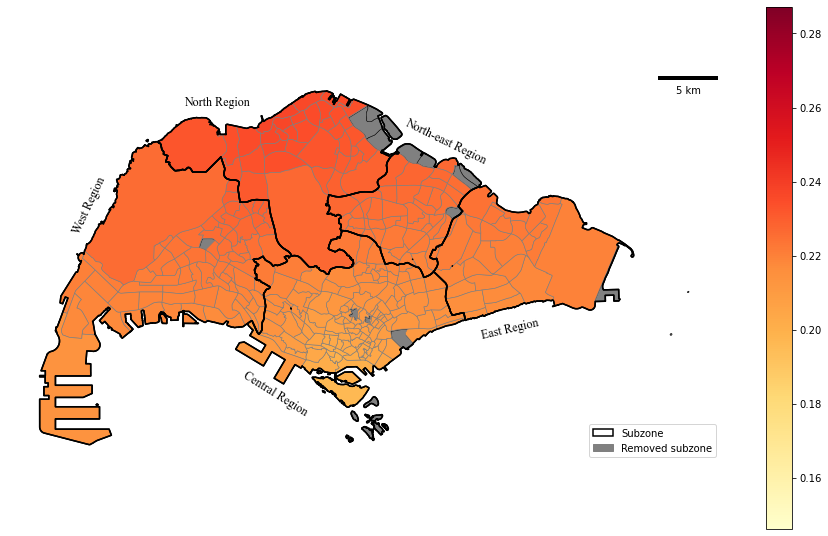

In [9]:
maxv = max(list(szone_localpedv['localpdev']))
minv = min(list(szone_localpedv['localpdev']))
maxv += 0.05
minv -= 0.05
draw(szone_localpedv,maxv,minv)

In [10]:
minv

0.146285

In [11]:
num = len(szone_localpedv.loc[(szone_localpedv['stdv_resi']>2.58)|(szone_localpedv['stdv_resi']<-2.58)].copy())
print('the percent of subzones {}'.format(num))

the percent of subzones 9


In [12]:
#set scale
#>2.5
#2.5~1.5
#1.5~1
#-1~1
#-1.5~-1.0
#-2.5~-1.5
#<-2.5
lis_range = [-2.5,-1.5,-1,1,1.5,2.5]
def get_rank(lis,df):
    df['std_resi_rank'] = 0
    result = pd.DataFrame(columns = df.columns)
    for i in range(len(lis)+1):
        if i == 0:
            a = df.loc[df['stdv_resi'] < lis[i]].copy()
            a.index = range(len(a))
            a['std_resi_rank'] = i
        elif i == len(lis):
            a = df.loc[df['stdv_resi'] >= lis[i-1]].copy()
            a.index = range(len(a))
            a['std_resi_rank'] = i
        else:
            a = df.loc[(df['stdv_resi'] <= lis[i])&(df['stdv_resi'] > lis[i-1])].copy()
            a.index = range(len(a))
            a['std_resi_rank'] = i
        
        result = result.append(a)
        del a
        
    result.index = range(len(result))    
    return result

result = get_rank(lis_range,szone_localpedv)
result = result[['SUBZONE_N','std_resi_rank']]
result

C:\Users\YOLO\AppData\Local\Temp/ipykernel_24484/2226708341.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(a)
C:\Users\YOLO\AppData\Local\Temp/ipykernel_24484/2226708341.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(a)
C:\Users\YOLO\AppData\Local\Temp/ipykernel_24484/2226708341.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(a)
C:\Users\YOLO\AppData\Local\Temp/ipykernel_24484/2226708341.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(a)
C:\Users\YOLO\AppData\Local\Temp/ipykernel_24484/2226708341.py:27: FutureWarning: The fr

,SUBZONE_N,std_resi_rank
0,BAYSHORE,1
1,BEDOK RESERVOIR,1
2,WOODLANDS REGIONAL CENTRE,1
3,MARITIME SQUARE,2
4,TIONG BAHRU STATION,2
...,...,...
308,CHIN BEE,6
309,SIMEI,6
310,HOUGANG EAST,6
311,HOUGANG WEST,6


In [13]:
#merge
szone_localpedv['std_resi_rank'] = 0
for i in range(len(szone_localpedv)):
    for x in range(len(result)):
        if result.loc[x,'SUBZONE_N'] == szone_localpedv.loc[i,'SUBZONE_N']:
            szone_localpedv.loc[i,'std_resi_rank'] = result.loc[x,'std_resi_rank']

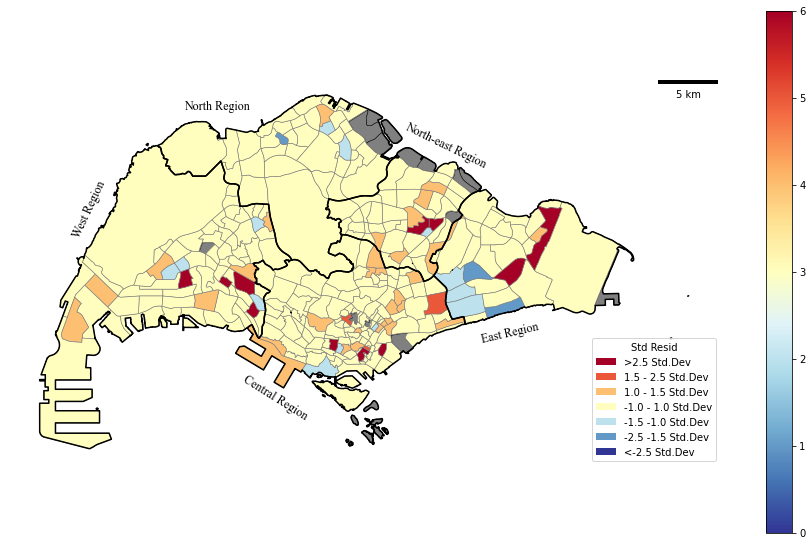

In [14]:
def draw_stard_resi(df,maxi,mini):
    fig, ax = plt.subplots(figsize = (16, 9.6))
    szone.plot(ax = ax,facecolor = "lightgrey",ec = "grey",linewidth = 0.8)
    
    for i in lis_removed_szone:
        isolated_szone = szone.loc[szone['SUBZONE_N'] == i].copy()
        isolated_szone.plot(ax = ax,facecolor = "grey",ec = "black",label = 'Removed Subzone',linewidth = 0.5)
        
    df.plot(ax = ax, column='std_resi_rank',cmap='RdYlBu_r',legend=True, ec = "grey",linewidth = 0.6,vmax = maxi,vmin = mini)
    region.plot(ax = ax,facecolor = "none",ec = "black",linewidth = 1.5,label = 'Region')
    
    #get legend
    cmap = plt.get_cmap('RdYlBu_r')
    patch1 = mpatches.Patch(facecolor=cmap(6/6),label = '>2.5 Std.Dev')
    patch2 = mpatches.Patch(facecolor=cmap(5/6),label = '1.5 - 2.5 Std.Dev')
    patch3 = mpatches.Patch(facecolor=cmap(4/6),label = '1.0 - 1.5 Std.Dev')
    patch4 = mpatches.Patch(facecolor=cmap(3/6),label = '-1.0 - 1.0 Std.Dev')
    patch5 = mpatches.Patch(facecolor=cmap(2/6),label = '-1.5 -1.0 Std.Dev')
    patch6 = mpatches.Patch(facecolor=cmap(1/6),label = '-2.5 -1.5 Std.Dev')
    patch7 = mpatches.Patch(facecolor=cmap(0/6),label = '<-2.5 Std.Dev')
    legend_element = [patch1,patch2,patch3,patch4,patch5,patch6,patch7]
    ax.legend(handles = legend_element,edgecolor = None,loc = 'lower right',fontsize = 10,title = 'Std Resid')
    
    ax.add_artist(ScaleBar(distance_meters,'m',length_fraction = 0.15))
    
    plt.text(103.635,1.365,s='West Region',rotation=65, rotation_mode='anchor',fontdict = {'family':'Times New Roman','size':12})
    plt.text(103.755,1.260,s='Central Region',rotation=-32, rotation_mode='anchor',fontdict = {'family':'Times New Roman','size':12})
    plt.text(103.932,1.288,s='East Region',rotation=13, rotation_mode='anchor',fontdict = {'family':'Times New Roman','size':12})
    plt.text(103.875,1.446,s='North-east Region',rotation=-26, rotation_mode='anchor',fontdict = {'family':'Times New Roman','size':12})
    plt.text(103.712,1.460,s='North Region',rotation=0, rotation_mode='anchor',fontdict = {'family':'Times New Roman','size':12})
    
    ax.axis('off')
    plt.savefig(r'C:\Users\YOLO\Desktop'+'\\'+'std_resi'+'.jpg',dpi = 1200)
    
draw_stard_resi(szone_localpedv,6,0)

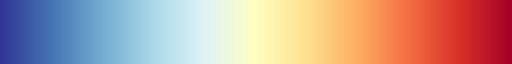

In [15]:
cmap = plt.get_cmap('RdYlBu_r')
cmap